In [13]:
from classifiers import Swap_classifier
from numpy import sqrt, array, pi, ones
from qiskit import BasicAer
import time

import numpy as np
import matplotlib.pylab as plt

In [2]:
# 1 qubit, 2 data points
num_copy = 1
x0 = array([1,1]) # label 0
x1 = array([1, -1]) # label 1
dataset = [x1 if i%2==0 else x0 for i in range(2*num_copy)]
label = [1 if i%2==0 else 0 for i in range(2*num_copy)]
alpha = ones(2*num_copy)
thetas = np.linspace(0, pi, 10)
testdataset = [array([np.cos(theta), np.sin(theta)]) for theta in thetas]

In [3]:
ZZVal = []

for testdata in testdataset:
    start = time.time()
    classifier = Swap_classifier(alpha, dataset, label, testdata)
    classifier.execute(backend = BasicAer.get_backend('qasm_simulator'))
    ZZVal.append(classifier.process())
    end = time.time()
    print(end-start)

0.1635146141052246
0.05008959770202637
0.04303622245788574
0.04463553428649902
0.043894290924072266
0.04493260383605957
0.04680132865905762
0.04448699951171875
0.04351353645324707
0.04025769233703613


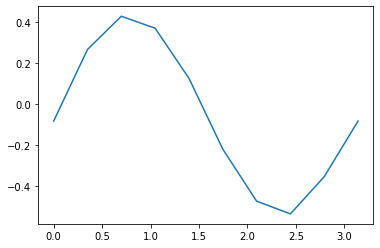

In [4]:
plt.plot(thetas, ZZVal)

In [21]:
from classifiers import Swap_classifier
from numpy import sqrt, array, pi, ones
from qiskit import BasicAer, QuantumCircuit, QuantumRegister
from qiskit.compiler import transpile
from qiskit.circuit import Parameter
from qiskit import execute
import time

import numpy as np
import matplotlib.pylab as plt

In [22]:
# 1 qubit N data
num_data = 2**1
num_qubit = 1
thetas = pi*np.random.rand(num_data)
dataset = [np.array([np.cos(theta), np.sin(theta)]) for theta in thetas]
label = [0 if theta>pi/2 else 1 for theta in thetas]
weight = label


In [23]:
classifier = Swap_classifier(weight, dataset, label, sum(dataset))
classifier_qc = classifier.circuit()
classifier_gate = classifier_qc.to_gate

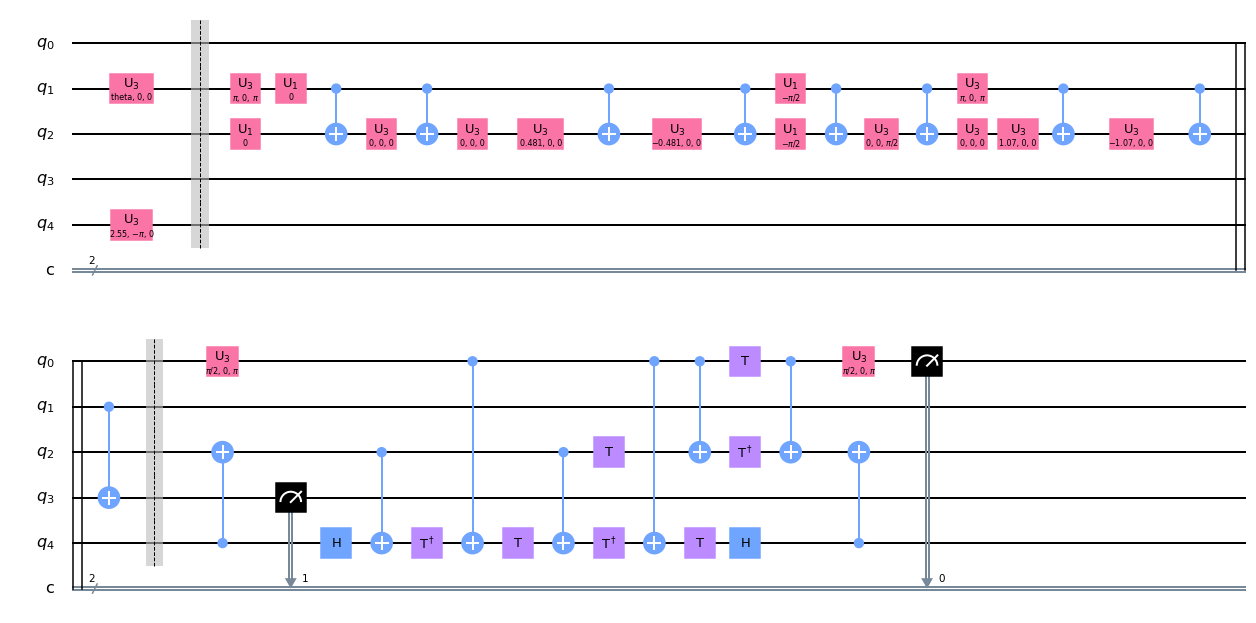

In [27]:
theta = Parameter('theta')
qc = QuantumCircuit(5, 2)
qc.ry(theta, 1)
qc.append(classifier_qc, range(5), range(2))
qc.decompose().decompose().decompose().draw('mpl')

[0, 1]


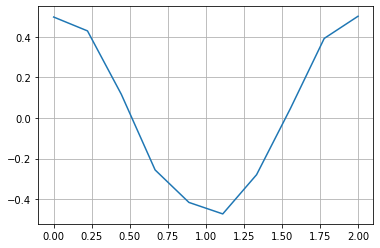

In [25]:
thetas = np.linspace(0, 2*pi, 10)
jobs = execute(qc, backend=BasicAer.get_backend('qasm_simulator'), parameter_binds=[{theta: t} for t in thetas])
from classifiers import process
ZZVal = [process(counts) for counts in jobs.result().get_counts()]
plt.plot(thetas/pi, ZZVal)
plt.grid()
print(label)

In [5]:
sum(dataset)

array([0.11650374, 1.96550522])

In [34]:
classifier_qc.data

[(<quantum_encoder.Encoder object at 0x7fd75a327880>, [Qubit(QuantumRegister(1, 'test'), 0)], []), (<qiskit.circuit.barrier.Barrier object at 0x7fd75a327e80>, [Qubit(QuantumRegister(1, 'ancila'), 0), Qubit(QuantumRegister(1, 'index'), 0), Qubit(QuantumRegister(1, 'data'), 0), Qubit(QuantumRegister(1, 'label'), 0), Qubit(QuantumRegister(1, 'test'), 0)], []), (<qiskit.circuit.controlledgate.ControlledGate object at 0x7fd75a519310>, [Qubit(QuantumRegister(1, 'index'), 0), Qubit(QuantumRegister(1, 'data'), 0)], []), (<qiskit.circuit.controlledgate.ControlledGate object at 0x7fd75a419670>, [Qubit(QuantumRegister(1, 'index'), 0), Qubit(QuantumRegister(1, 'data'), 0)], []), (<qiskit.circuit.library.standard_gates.x.CXGate object at 0x7fd75a511730>, [Qubit(QuantumRegister(1, 'index'), 0), Qubit(QuantumRegister(1, 'label'), 0)], []), (<qiskit.circuit.barrier.Barrier object at 0x7fd75a327190>, [Qubit(QuantumRegister(1, 'ancila'), 0), Qubit(QuantumRegister(1, 'index'), 0), Qubit(QuantumRegister(1